In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import time
XCr_path = os.getcwd()+'/../'
sys.path.append(XCr_path)
from XCrystal import *
t0 = time.time()

# Angular scan of a cube crystal with dislocation

## Loading XCrystal configuration

In [2]:
omega= 17450.0
xcr = XCrystal(XCr_path+'/config/Si440_17p45keVDislk60degGronkowskiFiniteCrystal3Dpar.yaml',omega)
pp=xcr.configure(0,0)

Geometry file was provided


In [3]:
matplotlib.rcParams['figure.figsize'] = (12,8)

## Loading angular scan files

U1fileN = 'run_omega_U1_1_36_angleFiniteCrystal_Si440_60deg_No_Dislocation.npy'
U2fileN = 'run_omega_U2_1_36_angleFiniteCrystal_Si440_60deg_No_Dislocation.npy'

U1_wxyzN = np.load(U1fileN)
U2_wxyzN = np.load(U2fileN)

In [4]:
U1file = 'run_angle_U1_1_36_FiniteCrystal_Si440_60deg_Dislocation.npy'
U2file = 'run_angle_U2_1_36_FiniteCrystal_Si440_60deg_Dislocation.npy'

U1_wxyz = np.load(U1file)
U2_wxyz = np.load(U2file)

## Padding with zeros to increase far field-display resolution 


aN=U1_wxyzN[:,:,:,5]
aN=np.pad(aN, ((0, 0),(450,450), (300,300)), 'constant', constant_values=(0.0 + 1j*0.0, 0.0 + 1j*0.0))
 


In [5]:

a=U1_wxyz[:,:,:,5]
a=np.pad(a, ((0, 0),(450,450), (300,300)), 'constant', constant_values=(0.0 + 1j*0.0, 0.0 + 1j*0.0))
 


In [6]:
a.shape

(36, 1200, 800)

## Propagating to the detector position using the Fresnel method

#### Propagation distance Lm [m]

In [7]:
Lm=4

In [8]:
L=Lm*xcr.convr

In [9]:
dxx=xcr.xx[1]-xcr.xx[0]
dyy=xcr.yy[1]-xcr.yy[0]
xxp = dxx*(np.arange(1,a.shape[1]+1) - 0.5*(a.shape[1]))
yyp = dyy*(np.arange(1,a.shape[2]+1) - 0.5*(a.shape[2]))
xxp.shape
xcr.xx.shape
yyp.shape
Yyp, Xxp = np.meshgrid(yyp,xxp) # x,y mesh/grid
dxf_out = 2*np.pi*L/(dxx*a.shape[1])
dyf_out = 2*np.pi*L/(dyy*a.shape[2])
xxp_out = dxf_out*(np.arange(1,a.shape[1]+1) - 0.5*(a.shape[1]))
yyp_out = dyf_out*(np.arange(1,a.shape[2]+1) - 0.5*(a.shape[2]))
Yyp_out, Xxp_out = np.meshgrid(yyp_out,xxp_out) # x,y mesh/grid
Yyp.shape


(1200, 800)

In [10]:
r_sq=Xxp**2+Yyp**2
G11 = np.fft.fftshift(np.fft.fft2(a*np.exp(1j/2*r_sq/L)),axes=(1,2))

## Displaying results in the near-field

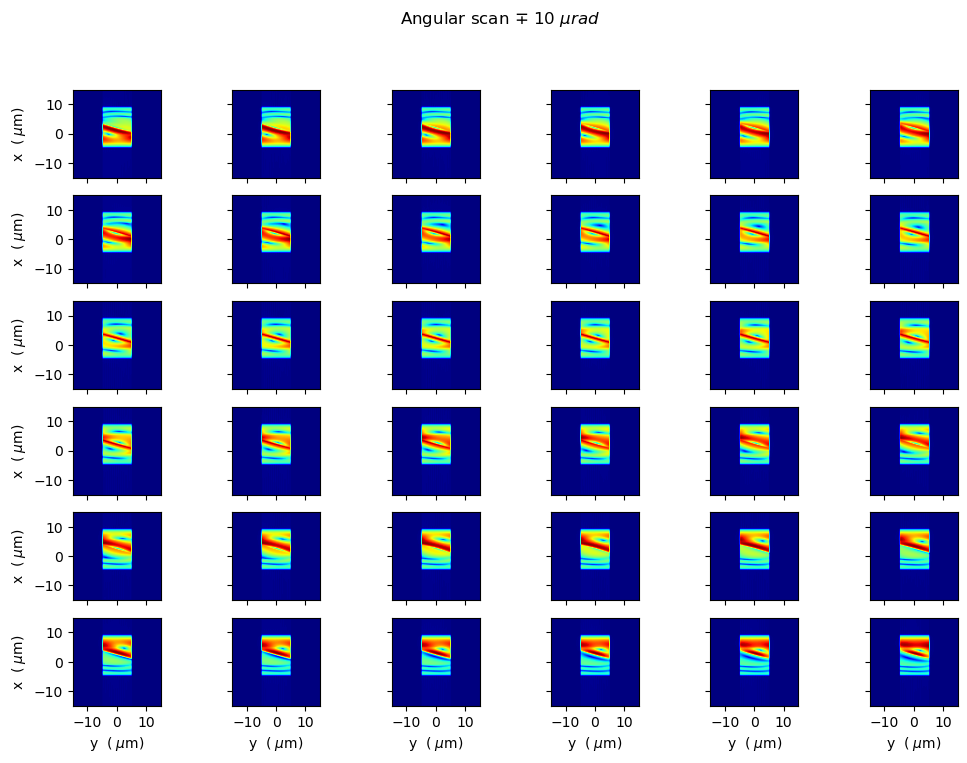

In [11]:
fig, ax = plt.subplots(nrows=6, ncols=6)
ii=-1
for row in ax:
    for col in row:
        ii=ii+1
        col.imshow((np.abs(a[ii,:,:])**0.5),extent=[xxp.min()/xcr.convr*1e6,xxp.max()/xcr.convr*1e6,yyp.min()/xcr.convr*1e6,yyp.max()/xcr.convr*1e6],cmap='jet')
fig.suptitle('Angular scan $\mp$ 10 $\mu rad$')
for ax in fig.get_axes():
    ax.set_ylim(-15,15)
    ax.set_xlabel(r'y  ( $\mu$m)')
    ax.set_ylabel(r'x  ( $\mu$m)')
    ax.set_xlim(-15,15)
    ax.label_outer()
plt.show()

## Displaying results in the far-field  

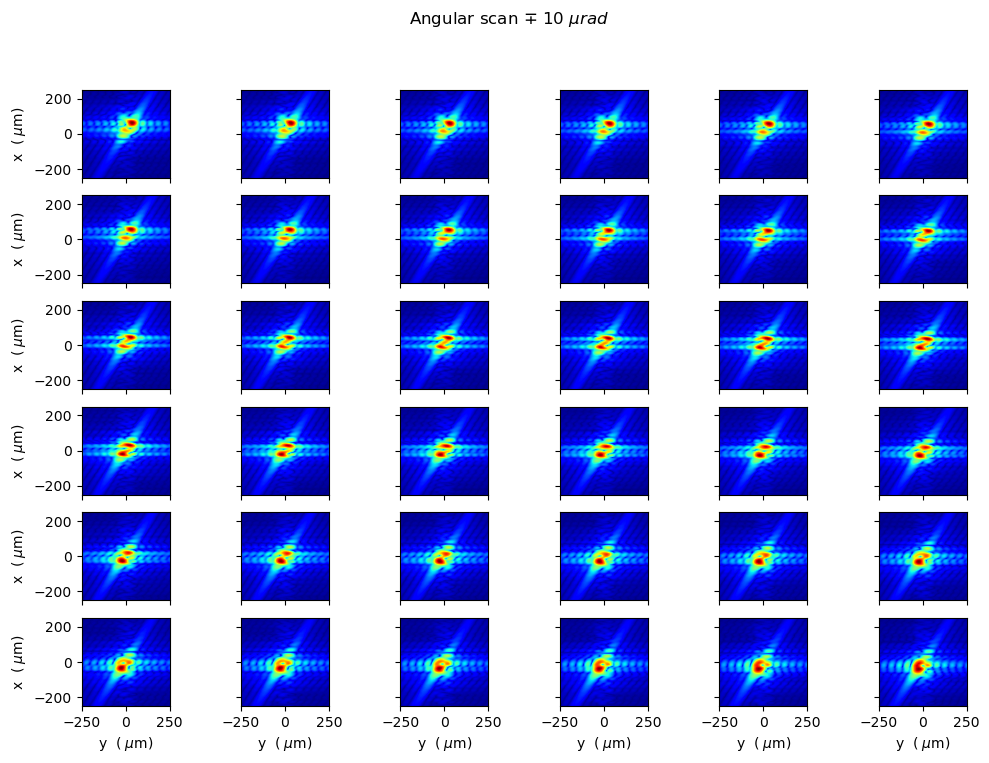

In [12]:
fig, ax = plt.subplots(nrows=6, ncols=6)
ii=-1
for row in ax:
    for col in row:
        ii=ii+1
        col.imshow((np.abs(G11[ii,:,:])**0.5),extent=[xxp_out.min()/xcr.convr*1e6,xxp_out.max()/xcr.convr*1e6,yyp_out.min()/xcr.convr*1e6,yyp_out.max()/xcr.convr*1e6],cmap='jet')
fig.suptitle('Angular scan $\mp$ 10 $\mu rad$')
for ax in fig.get_axes():
    ax.set_ylim(-250,250)
    ax.set_xlabel(r'y  ( $\mu$m)')
    ax.set_ylabel(r'x  ( $\mu$m)')
    ax.set_xlim(-250,250)
    ax.label_outer()
plt.show()

In [13]:
xcr.zsep

50